In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics.pairwise import rbf_kernel
%matplotlib notebook

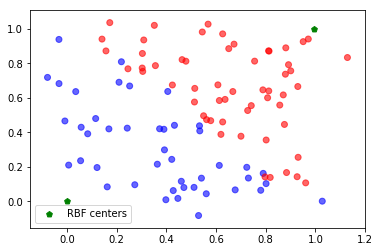

(100,)
(1000,)


In [4]:
def data_generator(N, D=1, violation_ratio=0.05): 
    noise = np.random.normal(loc=0, scale=violation_ratio, size=(N+1000,D))
    inputs = np.random.rand(N+1000, D)
    centers = np.array([inputs.max(axis=0),inputs.min(axis=0)])
#     centers = np.random.rand(2,D)
    dumb = rbf_kernel(inputs, centers, gamma=1)
    outputs = np.zeros(shape=(N+1000,1))
    outputs[dumb[:,0]>dumb[:,1]] = 1
    inputs = inputs + noise
    return centers, inputs[:N,:], outputs[:N,:].reshape(-1,), inputs[N:,:], outputs[N:,:].reshape(-1,)

def map_color(y): 
    colors = []
    for _ in range(len(y)):
        if y[_] == 1: 
            colors.append('r')
        else: 
            colors.append('b')
    return colors

c, X, y, X_test, y_test= data_generator(100,2)
plt.scatter(X[:,0],X[:,1], c=map_color(y),alpha=0.6)
plt.scatter(c[:,0], c[:,1], c='g', marker='p', label='RBF centers')
plt.legend()
plt.show()
print(y.shape)
print(y_test.shape)

In [197]:
import time
svc_1 = LinearSVC()
svc_2 = SVC(kernel='linear')

train_t_1, test_t_1, acc_1 = [], [], []
train_t_2, test_t_2, acc_2 = [], [], []

r = range(10,3001,10)

for _ in r:
    c, X, y, X_test, y_test= data_generator(_,2)
    
    start = time.time()
    svc_1.fit(X,y)
    train_t_1.append(time.time()-start)
    start = time.time()
    svc_2.fit(X,y)
    train_t_2.append(time.time()-start)
    
    start = time.time()
    svc_1.predict(X_test)
    test_t_1.append(time.time()-start)
    start = time.time()
    svc_2.predict(X_test)
    test_t_2.append(time.time()-start)
    
    acc_1.append(svc_1.score(X_test,y_test))
    acc_2.append(svc_1.score(X_test,y_test))

<IPython.core.display.Javascript object>


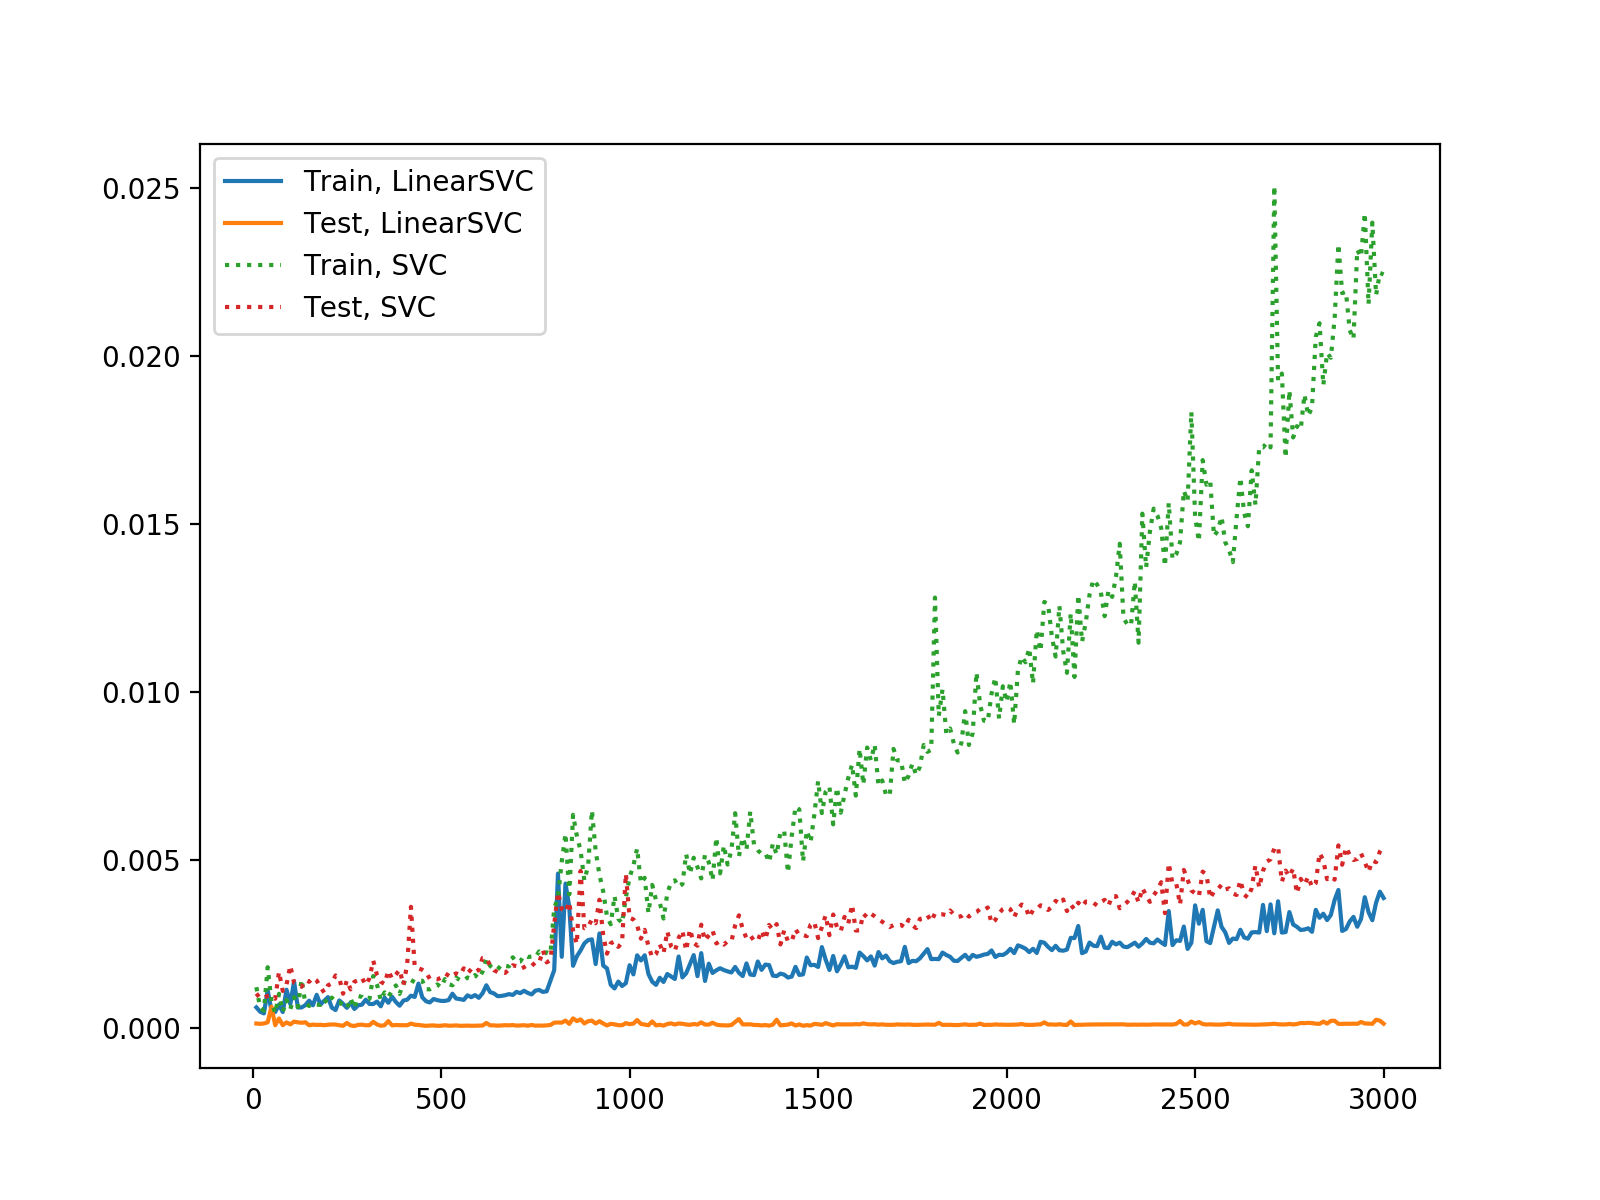

In [207]:
plt.figure(figsize=(8,6))
plt.plot(r,train_t_1, label='Train, LinearSVC')
plt.plot(r,test_t_1, label='Test, LinearSVC')
plt.plot(r,train_t_2, label='Train, SVC', linestyle=':')
plt.plot(r,test_t_2, label='Test, SVC', linestyle=':')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


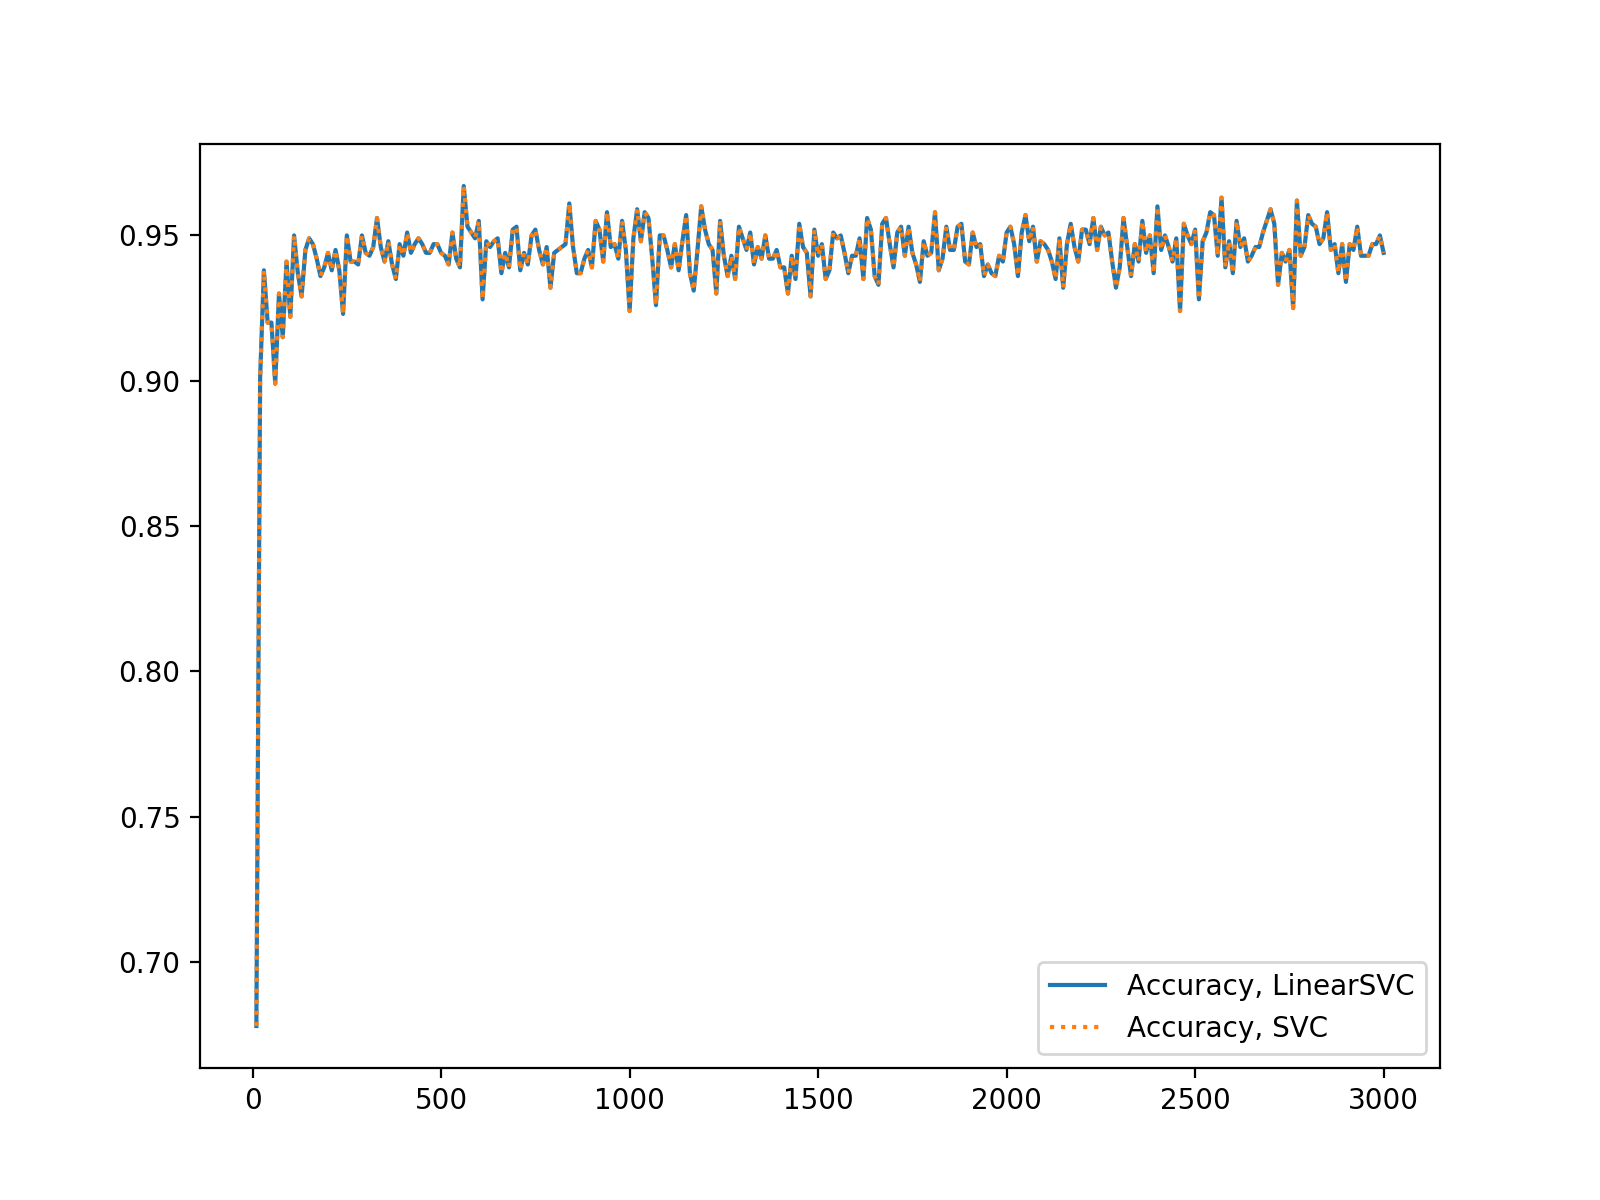

In [208]:
plt.figure(figsize=(8,6))
plt.plot(r,acc_1, label='Accuracy, LinearSVC')
plt.plot(r,acc_2, label='Accuracy, SVC', linestyle=':')
plt.legend()
plt.show()

In [213]:
svc_1 = LinearSVC()
svc_2 = SVC(kernel='linear')

train_t_1, test_t_1, acc_1 = [], [], []
train_t_2, test_t_2, acc_2 = [], [], []

r = range(1,200)

for _ in r:
    c, X, y, X_test, y_test= data_generator(1000,_)
    
    start = time.time()
    svc_1.fit(X,y)
    train_t_1.append(time.time()-start)
    start = time.time()
    svc_2.fit(X,y)
    train_t_2.append(time.time()-start)
    
    start = time.time()
    svc_1.predict(X_test)
    test_t_1.append(time.time()-start)
    start = time.time()
    svc_2.predict(X_test)
    test_t_2.append(time.time()-start)
    
    acc_1.append(svc_1.score(X_test,y_test))
    acc_2.append(svc_1.score(X_test,y_test))

/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

<IPython.core.display.Javascript object>


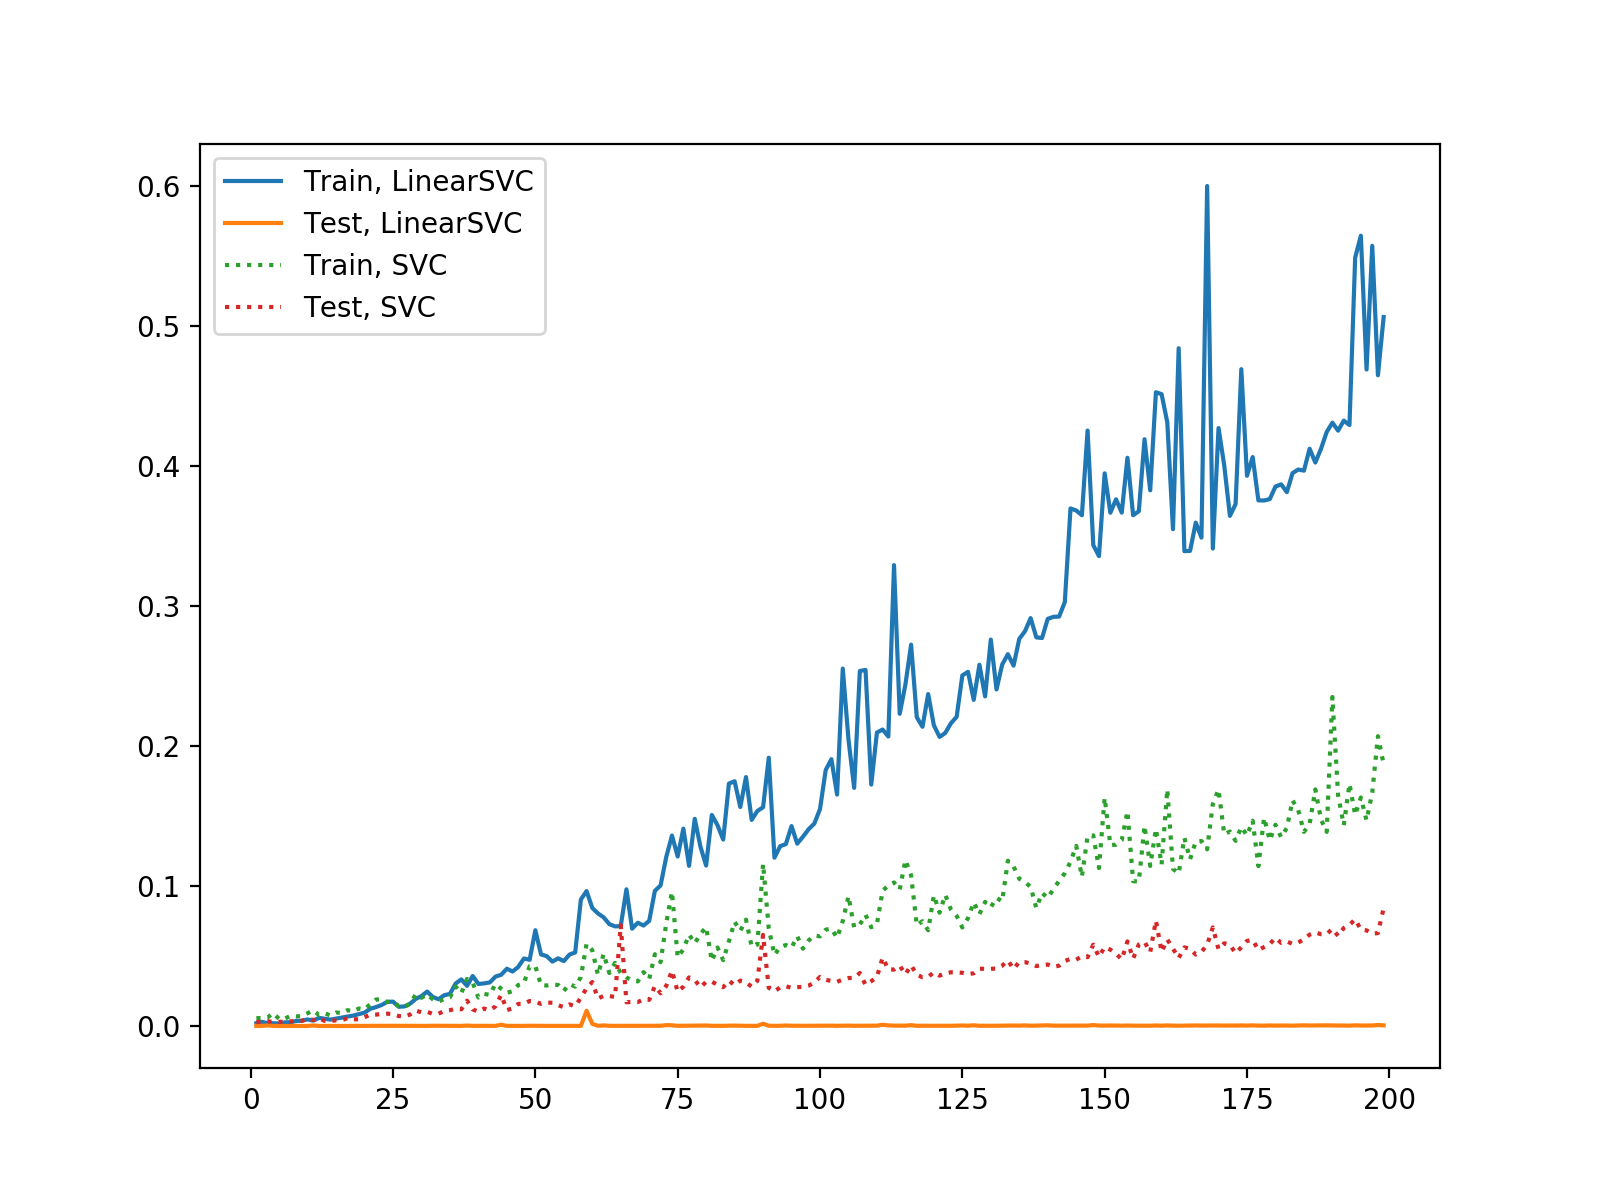

In [214]:
plt.figure(figsize=(8,6))
plt.plot(r,train_t_1, label='Train, LinearSVC')
plt.plot(r,test_t_1, label='Test, LinearSVC')
plt.plot(r,train_t_2, label='Train, SVC', linestyle=':')
plt.plot(r,test_t_2, label='Test, SVC', linestyle=':')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


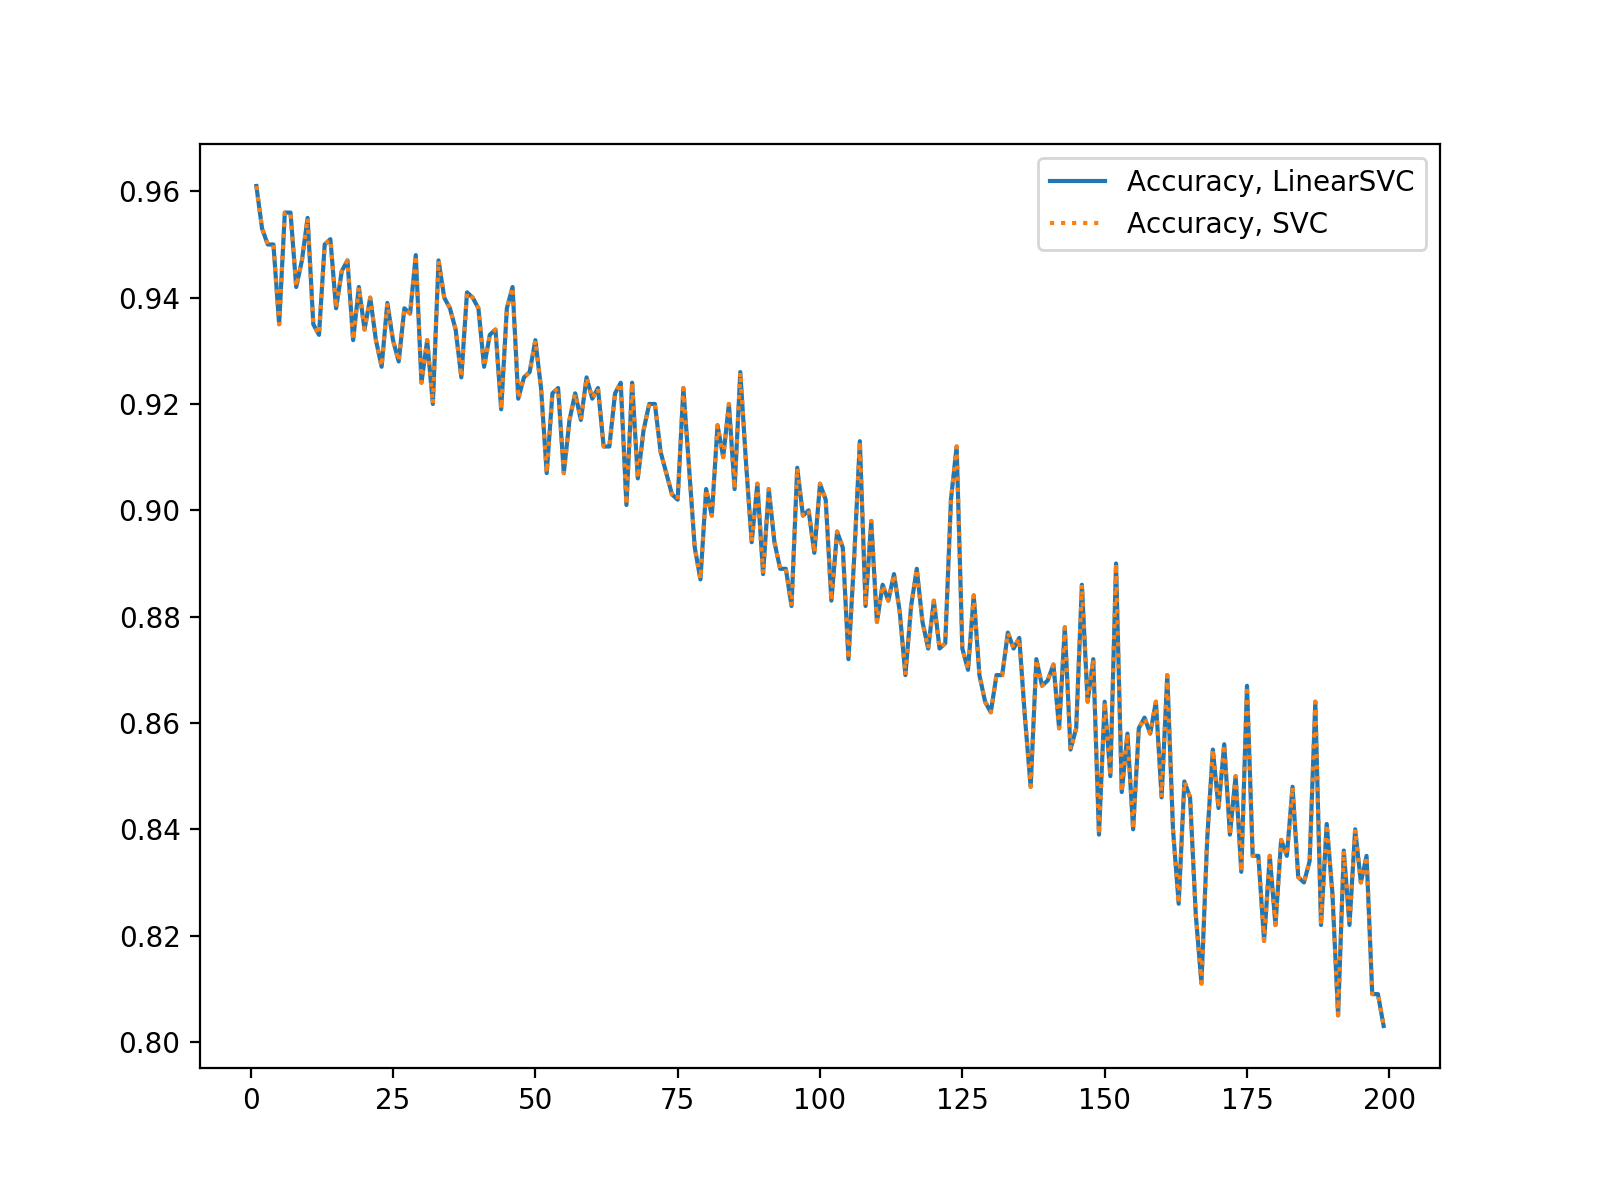

In [215]:
plt.figure(figsize=(8,6))
plt.plot(r,acc_1, label='Accuracy, LinearSVC')
plt.plot(r,acc_2, label='Accuracy, SVC', linestyle=':')
plt.legend()
plt.show()